<a href="https://colab.research.google.com/github/Tiagogavinhos/LGBT-Population---Annual-Comparison/blob/main/Popula%C3%A7%C3%A3o_LGBT_Comparativo_Anual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## ***What this dataset means ?***

The dataset available in the link above contains records of complaints related to human rights violations against the LGBTI+ population over the years in Brazil.



---
## ***Where download this dataset ?***

https://www.gov.br/mdh/pt-br/acesso-a-informacao/dados-abertos/disque100/balanco-geral-2011-a-2019-populacao-lgbt/populacao-lgbt-comparativo-anual.csv/view

Please, be aware that the dataset which will be worked is not original dataset.




---





In [42]:
###############################################################
###### LGBT Population - Annual Comparison - Brazilian Data
###############################################################
###### Step I : Uploading the necessary libraries
###############################################################

import pandas as pd
import matplotlib.pyplot as plt

In [31]:
####################################################################
###### LGBT Population - Annual Comparison - Brazilian Data
####################################################################
###### Step II : Updating the dataset on Google Drive
####################################################################

file_id = "1_Z1o1CqZuarczs8ik878JGtYW7fystTZ"
# Build direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Load into DataFrame
df = pd.read_csv(url)

# Display first few rows
df.head()


,UF,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AC,2,10,4,7,3,5,1,2,0
1,AL,17,63,16,47,16,20,30,16,18
2,AM,13,60,33,9,21,16,22,24,11
3,AP,0,6,4,2,2,3,1,1,1
4,BA,94,194,113,49,77,91,72,65,48


In [32]:
####################################################################
###### LGBT Population - Annual Comparison - Brazilian Data
####################################################################
###### Step III : Quick analyze
####################################################################

# Filter out the 'TOTAL' row and rows with NaN in 'UF' before describing
df_filtered_for_describe = df[df['UF'].notna() & (df['UF'] != 'TOTAL')]
describe_df = df_filtered_for_describe.describe()
display(describe_df)

################################################################################
###################### COMMENTS / ANALYZE ######################################
################################################################################

###### After filtering out the 'TOTAL' and NaN rows, the maximum value
###### now represents the true maximum for any given year across states.
###### There are no missing values on the spreadsheet for the years data.

####################################################################

,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,42.925926,112.000000,62.074074,36.740741,40.851852,43.777778,49.481481,43.296296,30.851852
std,44.680856,95.717935,68.676458,47.739350,48.019791,55.625349,58.122795,56.067826,46.430017
min,0.000000,6.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,10.000000,51.000000,16.500000,9.500000,15.500000,13.500000,20.000000,14.000000,7.500000
50%,26.000000,95.000000,47.000000,26.000000,29.000000,25.000000,30.000000,24.000000,18.000000
75%,65.000000,162.000000,74.500000,46.500000,47.000000,48.000000,55.000000,50.500000,32.500000
max,197.000000,405.000000,322.000000,250.000000,238.000000,277.000000,260.000000,274.000000,227.000000


In [33]:
####################################################################
###### LGBT Population - Annual Comparison - Brazilian Data
####################################################################
###### Step IV : Checking if there are any missing value
####################################################################

describe_df.isnull().sum()

################################################################################
###################### COMMENTS / ANALYZE ######################################
################################################################################

###### There are NO missing value

################################################################################


,0
2011,0
2012,0
2013,0
2014,0
2015,0
2016,0
2017,0
2018,0
2019,0


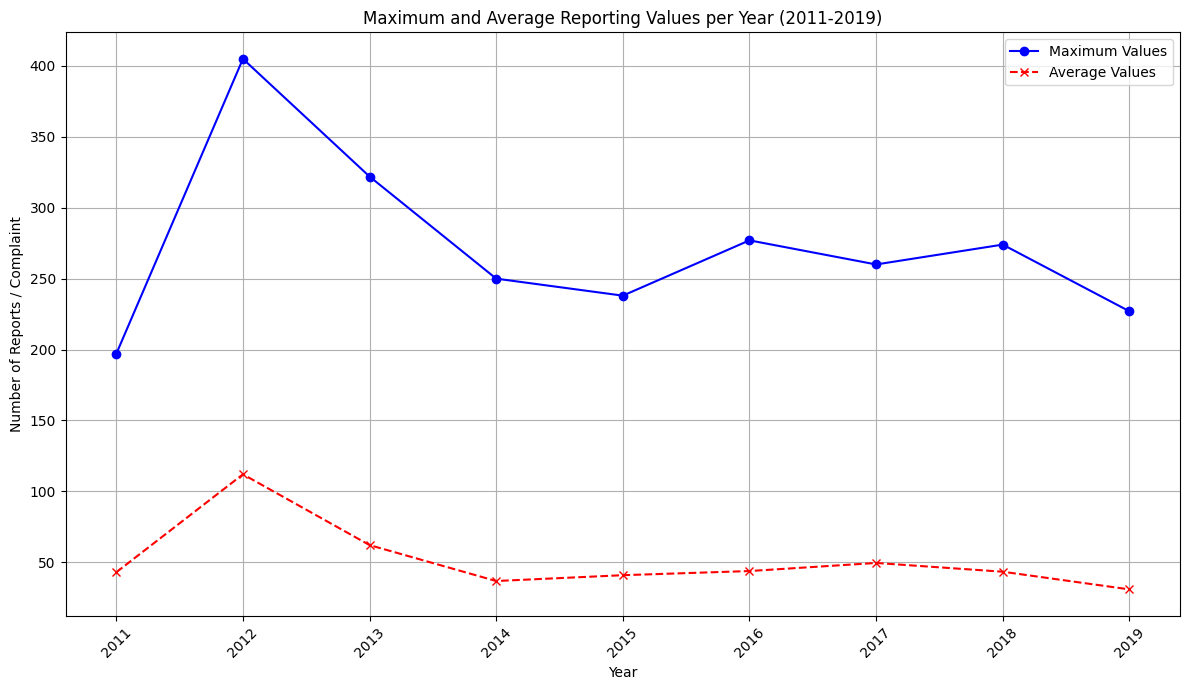

In [36]:
################################################################################
###### LGBT Population - Annual Comparison - Brazilian Data
####################################################################
###### Step V : Graph (Total x Year) + Average
####################################################################

years = [str(year) for year in range(2011, 2020)]
max_values = describe_df.loc['max', years]
mean_values = describe_df.loc['mean', years]

plt.figure(figsize=(12, 7))

# Plotar os valores máximos como um gráfico de linha
plt.plot(years, max_values, marker='o', linestyle='-', color='blue', label='Maximum Values')

# Adicionar a linha para os valores médios
plt.plot(years, mean_values, marker='x', linestyle='--', color='red', label='Average Values')

plt.title('Maximum and Average Reporting Values ​​per Year (2011-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Reports / Complaint')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

################################################################################
###################### COMMENTS / ANALYZE ######################################
################################################################################

###### From 2011 to 2012: Double the number of complaining - Good News !!!
###### From 2012 to 2014: Has a continuous decrease - Bad News !!!
###### From 2014 and Beyond: There are 'up and down'

################################################################################

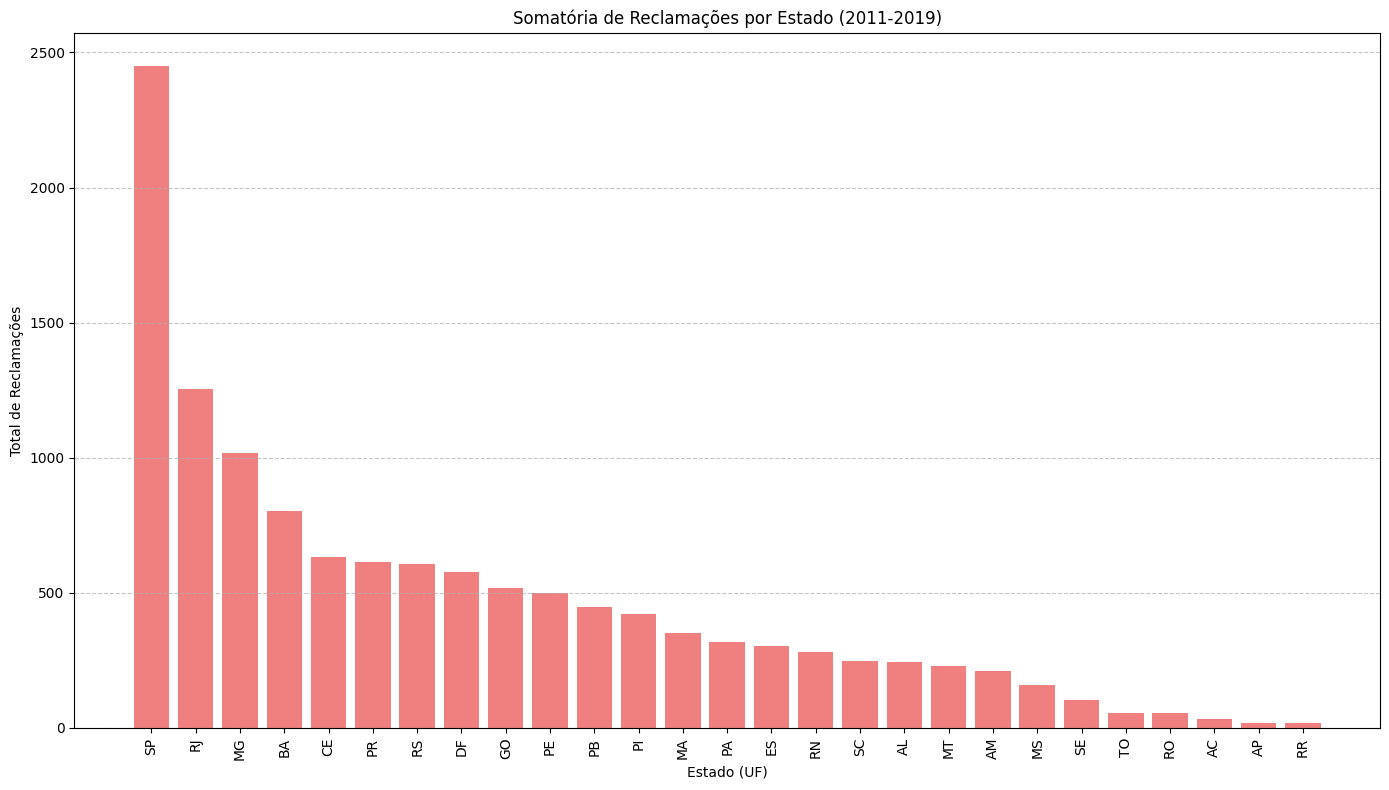

In [41]:
################################################################################
###### LGBT Population - Annual Comparison - Brazilian Data
################################################################################
###### Step VI : Graph (Total x Year) + Average
################################################################################

import matplotlib.pyplot as plt

# Identificar as colunas de ano no df_filtered_for_describe
years = [str(year) for year in range(2011, 2020)]

# Calcular a somatória das reclamações por estado
total_complaints_by_state_filtered = df_filtered_for_describe[years].sum(axis=1)

# Criar um DataFrame para facilitar a visualização e ordenação
states_total_complaints_df = pd.DataFrame({
    'UF': df_filtered_for_describe['UF'],
    'Total_Complaints': total_complaints_by_state_filtered
}).sort_values(by='Total_Complaints', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(states_total_complaints_df['UF'], states_total_complaints_df['Total_Complaints'], color='lightcoral')
plt.title('Somatória de Reclamações por Estado (2011-2019)')
plt.xlabel('Estado (UF)')
plt.ylabel('Total de Reclamações')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

################################################################################
###################### COMMENTS / ANALYZE ######################################
################################################################################

###### Top States: São Paulo (SP) and Rio de Janeiro (RJ) consistently show the
###### highest numbers of complaints.
###### Significant Contributors: Minas Gerais (MG), Bahia (BA), and Ceará (CE)
###### also show a considerable number of complaints
###### Lower Incidence States: States like Acre (AC), Amapá (AP), and Roraima (RR)
###### consistently report very low numbers of complaints

################################################################################
